# **EN502** - Machine Learning
## Project: `Kaggle Titanic Challenge`

---

This `Python Notebook` predict whether a person onboard would have survived "Titanic Disaster", in accordance to the dataset provided.

**Accuracy**: `80.382%` <br>
**Kaggle Rank**: `500/14432` ⭐ TOP 3% ⭐

||Team||
|:--|:-:|--:|
|Tanuj **Raghav**|19-11-EC-**027**|tanuj81_soe@jnu.ac.in|
|Pragyan **Jaiminy**|19-11-EC-**028**|pragya32_soe@jnu.ac.in|
|Pushpak **Prateek**|19-11-EC-**039**|pushpa89_soe@jnu.ac.in|

In [ ]:
# Importing Libraries
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## Understanding Training Dataset

In [ ]:
# Titanic Training Dataset
train = pd.read_csv("https://gist.github.com/tanujraghav/b35f9f20d5f6bd6cf19ba5fa43c4616f/raw/550946ba89f4a8b0a32ee4725e0c98ebf722a13a/train.csv")

#train.head()

## Feature Engineering

In [ ]:
def clean(df):

  df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split(' ')[1]).map({
      'Mr.': 0, 'Dr.': 0,
      'Major.': 1, 'Col.': 1, 'Capt.': 1,
      'Mrs.': 2, 'Mme.': 2,
      'Miss.': 3, 'Mlle.': 3, 'Ms.': 3,
      'Master.': 4,
      'Don.': 5, 'Dona.': 5, 'Rev.': 5, 'Jonkheer.': 5,
      'Lady.': 6, 'Sir.': 6, 'the': 6
      })

  df['NameLen'] = df.Name.apply(lambda x: len(x))

  df['Surname'] = df.Name.apply(lambda x: x.split(',')[0])

  def all_died(surname):
    if train[train.Surname == surname].Survived.count() < 2:
      return 0
    else:
      if train[train.Surname == surname].Survived.sum() == 0:
        return 1
      else:
        return 0

  df['SurnameAllDied'] = df.Surname.apply(all_died)

  def one_lived(surname):
    if train[train.Surname == surname].Survived.count() < 2:
      return 0
    else:
      if train[train.Surname == surname].Survived.sum() == 0:
        return 0
      else:
        return 1

  df['SurnameOneLived'] = df.Surname.apply(one_lived)

  df.Sex = df.Sex.map({'female' :0, 'male': 1})

  k = {}

  for i in df.Title:
    k[i] = df.Age[df.Age.notnull() & (df.Title == i)].mean()

  for i, j in df.iterrows():
    if j.Age != j.Age:
      df.loc[i, 'Age'] = k[j.Title]

  df.Age = pd.cut(df.Age, [0, 14, 24, 64, 80], labels = [0, 1, 2, 3])

  df['FamilySize'] = df.SibSp + df.Parch + 1
  df['FamilyType'] = pd.cut(df.FamilySize, [0, 1, 4, 7, 12], labels = [0, 1, 2, 3])

  for i in range(1, 4):
    x = df.Fare[df.Pclass == i]
    df.Fare[df.Pclass == i] = pd.cut(x.fillna(x.median()), [x.min() - 0.01, x.median(), x.mean(), x.max() + 0.01], labels = [0, 1, 2])

  df.Fare = df.Fare.map({0: 0, 1: 1, 2: 2})

  df.Cabin.fillna("I123", inplace = True)
  df['Deck'] = df.Cabin.apply(lambda x: ord(x[0]) - 65).replace(19, 7)

  df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0]).map({'C': 0, 'Q': 1, 'S': 2})

  df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

  return df

In [ ]:
# Cleaning Training Dataset
train = clean(train)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,NameLen,Surname,SurnameAllDied,SurnameOneLived,FamilySize,FamilyType,Deck
0,1,0,3,1,1,1,0,0,2,0,23,Braund,1,0,2,1,8
1,2,1,1,0,2,1,0,1,0,2,51,Cumings,0,0,2,1,2
2,3,1,3,0,2,0,0,0,2,3,22,Heikkinen,0,0,1,0,8
3,4,1,1,0,2,1,0,0,2,2,44,Futrelle,0,1,2,1,2
4,5,0,3,1,2,0,0,0,2,0,24,Allen,0,1,1,0,8


## Machine Learning

In [ ]:
# Accuracy Score Metric
from sklearn.metrics import accuracy_score as acc

In [ ]:
# Splitting up Dataset into "Dependent Variables" and "Independent Variables"
X = train.drop(['PassengerId', 'Survived', 'Surname'], axis=1)
Y = train.Survived

In [ ]:
# Logistic Regression: 80.382
from sklearn.linear_model import LogisticRegression as LR

model = LR(max_iter = 500, solver='sag').fit(X, Y)
Z = model.predict(X)

acc(Z, Y)

0.8473625140291807

## Predicting Survival Rate for Testing Dataset

In [ ]:
# Titanic Testing Dataset
test = pd.read_csv("https://gist.github.com/tanujraghav/b35f9f20d5f6bd6cf19ba5fa43c4616f/raw/550946ba89f4a8b0a32ee4725e0c98ebf722a13a/test.csv")

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Cleaning Testing Dataset
test.Fare[test.Fare.isnull() == True] = test.Fare[test.Pclass == 3].median()
test = clean(test)

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,NameLen,Surname,SurnameAllDied,SurnameOneLived,FamilySize,FamilyType,Deck
0,892,3,1,2,0,0,0,1,0,16,Kelly,0,1,1,0,8
1,893,3,0,2,1,0,0,2,2,32,Wilkes,0,0,2,1,8
2,894,2,1,2,0,0,0,1,0,25,Myles,0,0,1,0,8
3,895,3,1,2,0,0,1,2,0,16,Wirz,0,0,1,0,8
4,896,3,0,1,1,1,1,2,2,44,Hirvonen,0,0,3,1,8


In [ ]:
# Predicting Survival Status for Test Dataset
prediction = model.predict(test.drop(['PassengerId', 'Surname'], axis=1))

prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Setting up Submission

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': prediction
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv("submission.csv", index = False)

##**Analyses of Predictions**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


###Sex vs Survival Rate

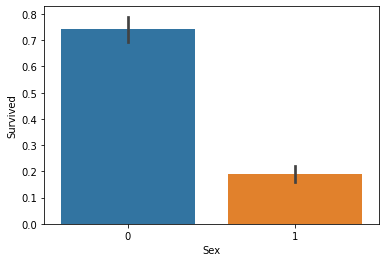

In [ ]:
sexPlot = sns.barplot(x="Sex", y="Survived", data=train)

### Age Vs Survival Rate

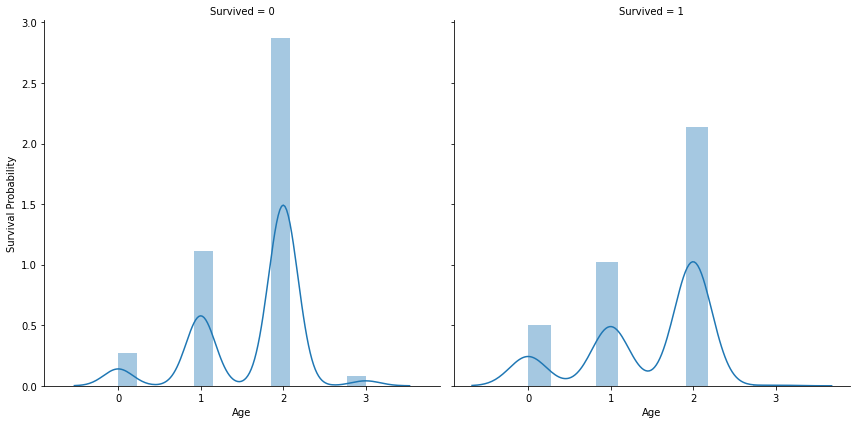

In [ ]:
agePlot = sns.FacetGrid(train, col="Survived", height = 6)
agePlot = agePlot.map(sns.distplot, "Age")
agePlot = agePlot.set_ylabels("Survival Probability")

## Class vs Survival

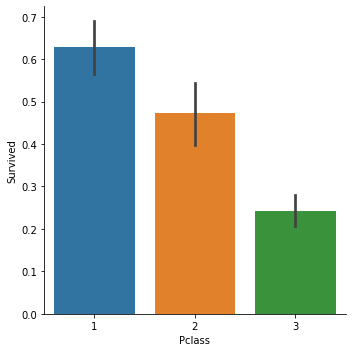

In [ ]:
passengerClassPlot = sns.catplot(x = "Pclass", y="Survived", data = train, kind="bar", height = 5)

Detailed Analysis

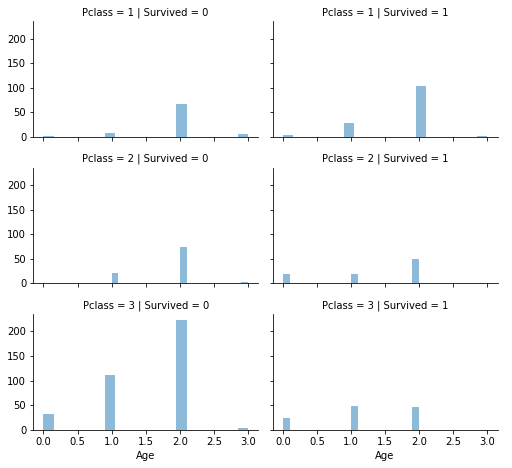

In [ ]:
pClassDet = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pClassDet.map(plt.hist, 'Age', alpha=.5, bins=20)
pClassDet.add_legend()